* Data requirements for generating useful representations
    + Working with the autoencoder we defined before in previous notebook

In [ ]:
#| echo: false
from data import *
from utils import *
from model import *

In [ ]:
#| echo: false
plt.style.use('dark_background')

In [ ]:
#| echo: false
#| output: false
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dls, train_df, valid_df = get_data()

## Dataset

* Our dataset is MNIST
    + A selection of ~70,000 handwritten digits -- a few sampels can be seen below:

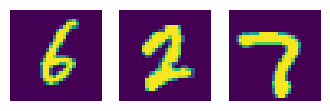

In [ ]:
#| echo: true
plot_dataset(train_df, num_samples=3)

In [ ]:
#| echo: false
model = Autoencoder()
learner = get_learner(dls, model, device=device)

## Model

* We'll be using an incredibly simple model for this task
    + Both the encoder & decoder feature have the same structure (encoder shown below)
      - Three convolutional layers with a single linear layer (660 MB RAM TOTAL) <br>

In [ ]:
#| echo: true
learner.model.encoder

Sequential(
  (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(28, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=2048, out_features=2, bias=True)
)

### Quick training loop
* This takes <1 minute with a single GPU vs 4 min on macbook

In [ ]:
#| echo: true
learner.fine_tune(10, 3e-2)

epoch,train_loss,valid_loss,time
0,3402.974121,3215.796387,00:10


epoch,train_loss,valid_loss,time
0,3089.285645,3029.437256,00:08
1,3047.984863,3021.844482,00:08
2,2986.998291,2961.164551,00:08
3,2961.992920,2928.680908,00:08
4,2862.808594,2881.205078,00:08
5,2832.602295,2844.041992,00:09
6,2797.664551,2797.941650,00:09
7,2742.184326,2713.693604,00:08
8,2705.889893,2670.089844,00:08
9,2638.182129,2655.055908,00:08


## Reconstructed Images

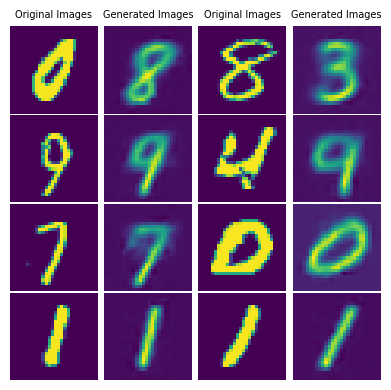

In [ ]:
#| echo: false
plt_subs(*get_valid_results(learner.model, dls.train), size=2)

## Latent space exploration

* Lets see how our validation set gets mapped into embedding space via our encoder
    + the model is able to map each number into it's own subspace -- some overlap considerably more than others

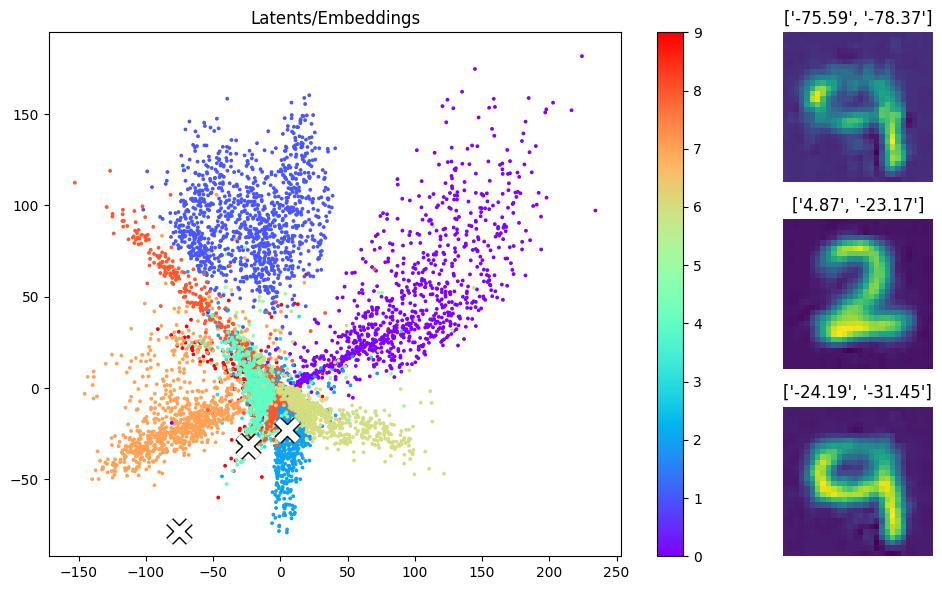

In [ ]:
#| fig-cap: "Figure 2: Embedding Space and Latent Reconstructions"
#| fig-subcap:
#|   - "left: embedding scatter plot <br> right: reconstructed latents"
plot_latent_regen(learner.model, min=-100, max=100)